In [7]:
import numpy as np
import pandas as pd
import ROOT as rt

rt.gStyle.SetOptStat(0)

In [38]:
v = pd.read_csv("./Values.csv")
e = pd.read_csv("./Errors.csv")
rows = v["Unnamed: 0"]
argsort = list(np.argsort(rows.to_numpy()))
rows = list(np.array([float(i) for i in rows])[argsort])
rows.pop()
rows.insert(0, 0)
rows = np.array(rows)
cols = list(v.keys()[1::])
cols.pop()
cols.insert(0, 0)
cols = np.array([float(i) for i in cols])
cols, rows

(array([ 0. ,  7. ,  8. ,  8.5,  9. , 10. , 10.5, 11. , 12. , 20. ]),
 array([ 0. ,  3. ,  3.5,  4. ,  5. ,  6. ,  8. , 10. , 20. ]))

In [39]:
values = pd.DataFrame(v.to_numpy()[:, 1::][argsort], index = rows, columns = cols)
errors = pd.DataFrame(e.to_numpy()[:, 1::][argsort], index = rows, columns = cols)

In [40]:
values

,0.0,7.0,8.0,8.5,9.0,10.0,10.5,11.0,12.0,20.0
0.0,0.924,0.277,0.166,0.207,0.288,0.242,0.256,0.270,0.338,0.393
3.0,0.229,0.232,0.198,0.175,0.255,0.305,0.267,0.281,0.334,0.395
3.5,0.232,0.263,0.237,0.268,0.361,0.341,0.356,0.357,0.406,0.513
4.0,0.394,0.245,0.300,0.325,0.519,0.532,0.525,0.529,0.592,0.594
5.0,0.231,0.244,0.350,0.397,0.692,0.710,0.717,0.709,0.828,0.810
6.0,0.299,0.249,0.365,0.396,0.755,0.799,0.788,0.785,0.952,0.958
8.0,0.219,0.249,0.377,0.413,0.767,0.794,0.792,0.784,0.972,0.981
10.0,0.219,0.242,0.370,0.402,0.759,0.810,0.801,0.786,0.977,0.962
20.0,0.279,0.238,0.363,0.394,0.751,0.785,0.782,0.791,0.970,0.979


In [41]:
errors

,0.0,7.0,8.0,8.5,9.0,10.0,10.5,11.0,12.0,20.0
0.0,0.377,0.015,0.010,0.012,0.011,0.015,0.018,0.014,0.010,0.027
3.0,0.107,0.012,0.012,0.010,0.010,0.019,0.018,0.015,0.011,0.032
3.5,0.166,0.010,0.011,0.012,0.010,0.017,0.019,0.015,0.010,0.032
4.0,0.166,0.005,0.008,0.008,0.008,0.013,0.014,0.012,0.008,0.021
5.0,0.053,0.005,0.008,0.009,0.008,0.015,0.015,0.013,0.009,0.025
6.0,0.051,0.003,0.005,0.006,0.006,0.010,0.011,0.009,0.007,0.019
8.0,0.043,0.003,0.006,0.006,0.006,0.011,0.012,0.010,0.007,0.020
10.0,0.021,0.002,0.003,0.003,0.003,0.006,0.007,0.005,0.004,0.010
20.0,0.026,0.002,0.003,0.003,0.003,0.005,0.006,0.005,0.003,0.009


1126

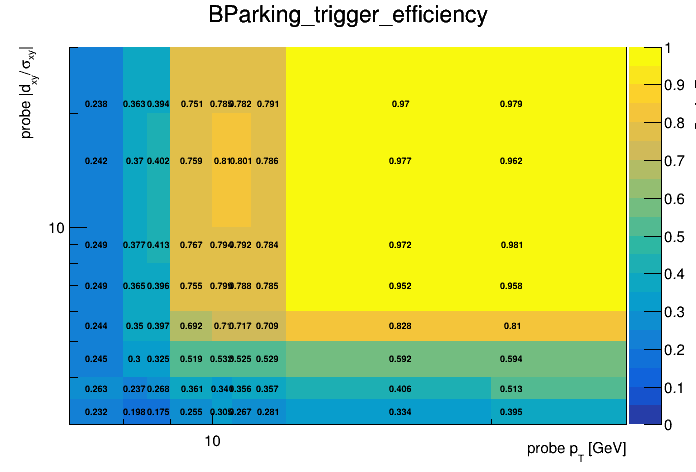

In [42]:
values_n = values.to_numpy()
errors_n = errors.to_numpy()
file = rt.TFile("BParking_SF.root", "RECREATE")

codehistogram = rt.TH2F("BParking_trigger_efficiency", "BParking_trigger_efficiency", len(cols)-1, cols, len(rows)-1, rows)
histogram.GetZaxis().SetRangeUser(0, 1)
histogram.GetXaxis().SetRangeUser(0, 300)
histogram.GetYaxis().SetRangeUser(0, 3000)
histogram.GetXaxis().SetTitle("probe p_{T} [GeV]")
histogram.GetYaxis().SetTitle("probe |d_{xy}/#sigma_{xy}|")
histogram.GetZaxis().SetTitle("Scale Factor")

for i in range(len(values_n)):
    for j in range(len(values_n[0])):
        # pass
        # print(i, j)
        histogram.SetBinContent(j+1, i+1, float(values_n[i][j]))
        histogram.SetBinError(j+1, i+1, float(errors_n[i][j]))
c = rt.TCanvas()
c.SetLogy()
c.SetLogx()
c.Draw()
histogram.Draw("colzTEXT")
file.Write()

<h1>Testing</h1>

In [54]:
histogram.GetBinContent(histogram.GetXaxis().FindFixBin(500), histogram.GetXaxis().FindFixBin(500))

0.9789999723434448